# Introduction
Boston AirBnb dataset from [Kaggle](https://www.kaggle.com/airbnb/boston) is a great resource to be familiar with airbnb rental business for future host and also guest. If you ever plan to visit Boston and enjoy nearby places and attractions or make a single night stop for your personal business,do NOT hesitate to do it. Here in this Jupyter notebook, we  went through the CRISP-DM process and tried to find out three main findings. These questions surely can bring insights to any host who is willing to host or customer  who is willing to pay for a lovely stay around Boston city. Below are the questions we had in my mind in regard to the dataset and we gathered, assesd and cleaned them as neccssary for my desired analysis and model building.

## Primary thought about data and queries
1. Can you describe the vibe of each Boston neighborhood using listing descriptions?
2. What are the busiest times of the year to visit Boston? By how much do prices spike?
3. What factors affect the price of an AirBnB rental? Let's find out!


# Import Packages

In [126]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math
import seaborn as sns
%matplotlib inline

# Gather and Assess Data

There are three csv files. listings.csv,reviews.csv and calendar.csv. for Boston area data. We can indiviadullay look at these files to trim and clean. Finally a tidy dataset for our analysis and model building will be ready.

## Listing File

In [127]:

df_listings = pd.read_csv('./listings.csv',sep = ',')

pd.set_option('display.max_columns', None)#https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [128]:
df_listings.shape

(3585, 95)

In [129]:
#find missing values and data type
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [130]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


## Reviews File

In [131]:

df_reviews = pd.read_csv('./reviews.csv',sep = ',')

pd.set_option('display.max_columns', None)#https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [132]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [133]:
df_reviews.shape

(68275, 6)

In [134]:
df_reviews.nunique()

listing_id        2829
id               68275
date              2045
reviewer_id      63789
reviewer_name    14775
comments         67311
dtype: int64

## Calendar File

Let's look at the table to check data quality now. In later section of this notebook, we will clean and answer our question of interest related to this dataset. 

In [135]:
df_calendar = pd.read_csv('./calendar.csv',sep = ',')

pd.set_option('display.max_columns', None)#https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe
df_calendar.head(20)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


## Notes

1. In calendar dataset there are 3585 unique values of listing id which matches with listing dataset.
2. Calendar dataset contain 365 unique days which starts from 2016-09-06 and ends at 2017-09-05.The date field is in string format (object)
3. Total no of columns are four: listing_id, available, date and price. We can probably merge this data with the listing dataset.
4. Listing dataset has price, security_deposit and cleaning_fee columns as object. Needs to be converted as float type dtype.
5. In review file, there are five columns with listing_id,id, date, reviewer_id, reviewer_name and comments. Here data type are integer and object type. Most interesting feature is comment from reviewers obviously.

There are 33 columns with numeric values and 62 columns of object type in listing file. Certainly, the total number of variables are quite high. For the sake of simplicity, we will consider price as a target(dependant) variable here in our primary analysis and possibly neighbourhood_overview to find out positive/negetive vibe about overall staying experience at individual place.

Data from Boston AirBNB rentals can be used to understand the earning portfolio in certain time frames and localities. If there is anything about the properties that helps me predict price? Can I find negative and positive reviews based on text? First, I will explore the Boston AirBnb Dataset.

# EDA
We will follow the standard rule of Exploratory Data Analysis.Let's analyze univariate, bivariate and multivariate features at several steps of the analysis part and document the findings and insights as a final blog post.

In [136]:
# Create new dataframe with variables of interest
listing= df_listings[["id","price", "neighbourhood_cleansed", "bedrooms","bathrooms","beds",
                   "property_type", "bed_type","room_type", "name", "summary",
                   "amenities", "number_of_reviews","review_scores_rating","neighborhood_overview",
                   "minimum_nights","cancellation_policy","guests_included","instant_bookable"]]

listing.head()

,id,price,neighbourhood_cleansed,bedrooms,bathrooms,beds,property_type,bed_type,room_type,name,summary,amenities,number_of_reviews,review_scores_rating,neighborhood_overview,minimum_nights,cancellation_policy,guests_included,instant_bookable
0,12147973,$250.00,Roslindale,2.0,1.5,3.0,House,Real Bed,Entire home/apt,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...","{TV,""Wireless Internet"",Kitchen,""Free Parking ...",0,NaN,"Roslindale is quiet, convenient and friendly. ...",2,moderate,1,f
1,3075044,$65.00,Roslindale,1.0,1.0,1.0,Apartment,Real Bed,Private room,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,"{TV,Internet,""Wireless Internet"",""Air Conditio...",36,94.0,"The room is in Roslindale, a diverse and prima...",2,moderate,0,t
2,6976,$65.00,Roslindale,1.0,1.0,1.0,Apartment,Real Bed,Private room,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",41,98.0,The LOCATION: Roslindale is a safe and diverse...,3,moderate,1,f
3,1436513,$75.00,Roslindale,1.0,1.0,2.0,House,Real Bed,Private room,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1,100.0,Roslindale is a lovely little neighborhood loc...,1,moderate,2,f
4,7651065,$79.00,Roslindale,1.0,1.5,2.0,House,Real Bed,Private room,Come Home to Boston,"My comfy, clean and relaxing home is one block...","{Internet,""Wireless Internet"",""Air Conditionin...",29,99.0,"I love the proximity to downtown, the neighbor...",2,flexible,1,f


Since we have short listed our features of interests, let's look at them again. 

In [137]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 19 columns):
id                        3585 non-null int64
price                     3585 non-null object
neighbourhood_cleansed    3585 non-null object
bedrooms                  3575 non-null float64
bathrooms                 3571 non-null float64
beds                      3576 non-null float64
property_type             3582 non-null object
bed_type                  3585 non-null object
room_type                 3585 non-null object
name                      3585 non-null object
summary                   3442 non-null object
amenities                 3585 non-null object
number_of_reviews         3585 non-null int64
review_scores_rating      2772 non-null float64
neighborhood_overview     2170 non-null object
minimum_nights            3585 non-null int64
cancellation_policy       3585 non-null object
guests_included           3585 non-null int64
instant_bookable          3585 non-null object


In [138]:
listing.nunique()

id                        3585
price                      324
neighbourhood_cleansed      25
bedrooms                     6
bathrooms                   12
beds                        11
property_type               13
bed_type                     5
room_type                    3
name                      3504
summary                   3113
amenities                 3092
number_of_reviews          178
review_scores_rating        48
neighborhood_overview     1728
minimum_nights              29
cancellation_policy          4
guests_included             13
instant_bookable             2
dtype: int64

### Observations
1. From the above info it is evident that we have diverse set of numerical, categorical and text data. Let's split them up in two group since text data needs to be processed differently:
2. Price is object type which should be float type. 
2. Amenities, summary,name are text type.

In [139]:
listing.head(3)

,id,price,neighbourhood_cleansed,bedrooms,bathrooms,beds,property_type,bed_type,room_type,name,summary,amenities,number_of_reviews,review_scores_rating,neighborhood_overview,minimum_nights,cancellation_policy,guests_included,instant_bookable
0,12147973,$250.00,Roslindale,2.0,1.5,3.0,House,Real Bed,Entire home/apt,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...","{TV,""Wireless Internet"",Kitchen,""Free Parking ...",0,NaN,"Roslindale is quiet, convenient and friendly. ...",2,moderate,1,f
1,3075044,$65.00,Roslindale,1.0,1.0,1.0,Apartment,Real Bed,Private room,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,"{TV,Internet,""Wireless Internet"",""Air Conditio...",36,94.0,"The room is in Roslindale, a diverse and prima...",2,moderate,0,t
2,6976,$65.00,Roslindale,1.0,1.0,1.0,Apartment,Real Bed,Private room,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",41,98.0,The LOCATION: Roslindale is a safe and diverse...,3,moderate,1,f


In [140]:
listing.describe()

,id,bedrooms,bathrooms,beds,number_of_reviews,review_scores_rating,minimum_nights,guests_included
count,3.585000e+03,3575.000000,3571.000000,3576.000000,3585.000000,2772.000000,3585.000000,3585.000000
mean,8.440875e+06,1.255944,1.221647,1.609060,19.044630,91.916667,3.171269,1.429847
std,4.500787e+06,0.753060,0.501487,1.011745,35.571658,9.531686,8.874133,1.056787
min,3.353000e+03,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000
25%,4.679319e+06,1.000000,1.000000,1.000000,1.000000,89.000000,1.000000,1.000000
50%,8.577620e+06,1.000000,1.000000,1.000000,5.000000,94.000000,2.000000,1.000000
75%,1.278953e+07,2.000000,1.000000,2.000000,21.000000,98.250000,3.000000,1.000000
max,1.493346e+07,5.000000,6.000000,16.000000,404.000000,100.000000,300.000000,14.000000


In [141]:
# clean the price str and convert to float type from object
listing["price"]= listing["price"].str.replace(',', '').str.replace('$', '').astype(float)# https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python
listing.price.head()

/Users/lailashahreen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

In [142]:
listing.price.describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

Most data are concentrated below price 400 USD and this also confirmed by the distribution. Although a few  higher prices are recorded but those could be droped as outliers for better accuracy of our prediction.

### Univariate Data Analysis

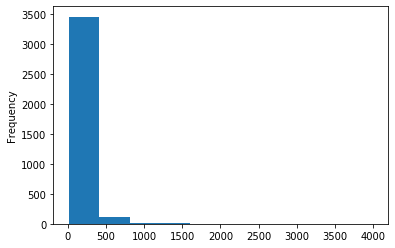

In [143]:
#distribution of prices

listing.price.plot(kind ='hist');

An absurd value of 4000 USD per night has appeared in the dataset which does not make sense. We can definitely drop or double check. 

In [144]:
#eliminate crazy prices:
listing = listing[listing["price"] < 600]

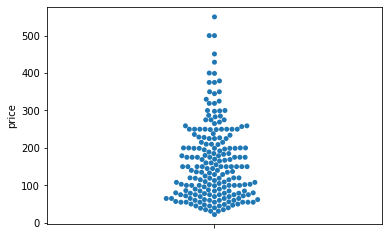

In [145]:
sns.swarmplot(y=listing['price'].sample(200));


So the crazy prices above USD 600 have been removed from the dataframe. 

# What factors affect the price of an AirBnB rental? Let's find out!
Now it is time to answer the question and I will begin with the third one. First we will check with neighborhood_cleansed type. At first, I will create a function and apply that to create our plots for visual inspection. Price vs. features(bedrooms, bathrooms,property type, beds,instant_bookable,cancellation policy,reviews_score_ratings, neighborhood_cleansed, room_type, minimum_nights) visualizations are created below. 

## Bivariate Analysis

In [165]:
def plot_price_by_feature(col_name,df = listing,figsize = [14.27, 10.27]):
    """
    This function takes the column name and dataframe and returns the price ditribution against 
    each categorical variable.
    """
    fig = plt.figure(figsize = figsize)
    base_color = sns.color_palette()[0]
    sort_order = listing.groupby(col_name)['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
    sns.boxplot(y='price', x=col_name, data=listing, order=sort_order,color = base_color)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title("Price Distribution Against {}".format(col_name), fontsize =14)
    ax.set_ylabel('Price',fontsize = 14)
    ax.set_xlabel(col_name, fontsize = 14)
    plt.show()
    

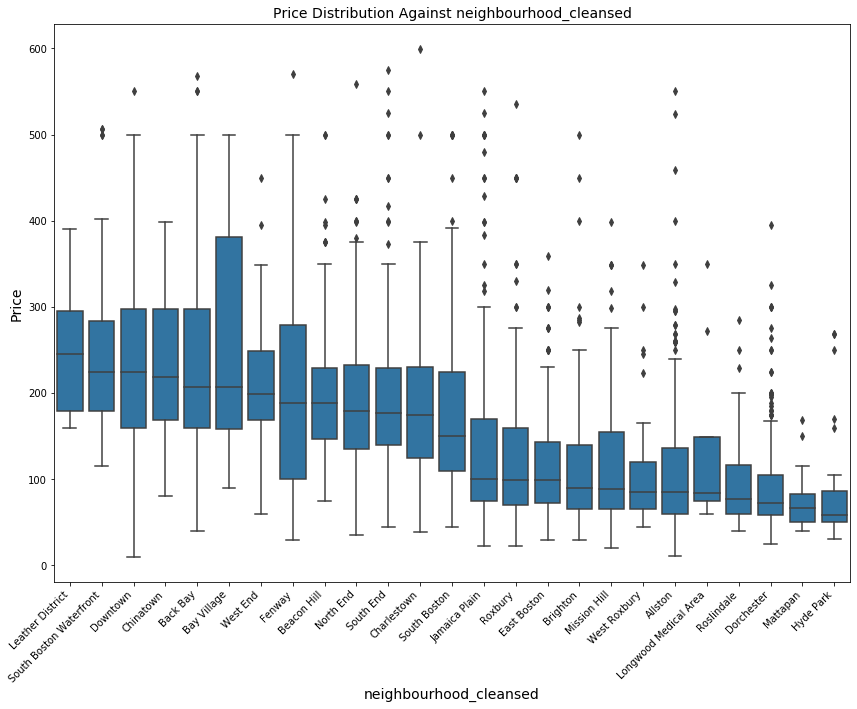

In [166]:
plot_price_by_feature('neighbourhood_cleansed',df = listing);

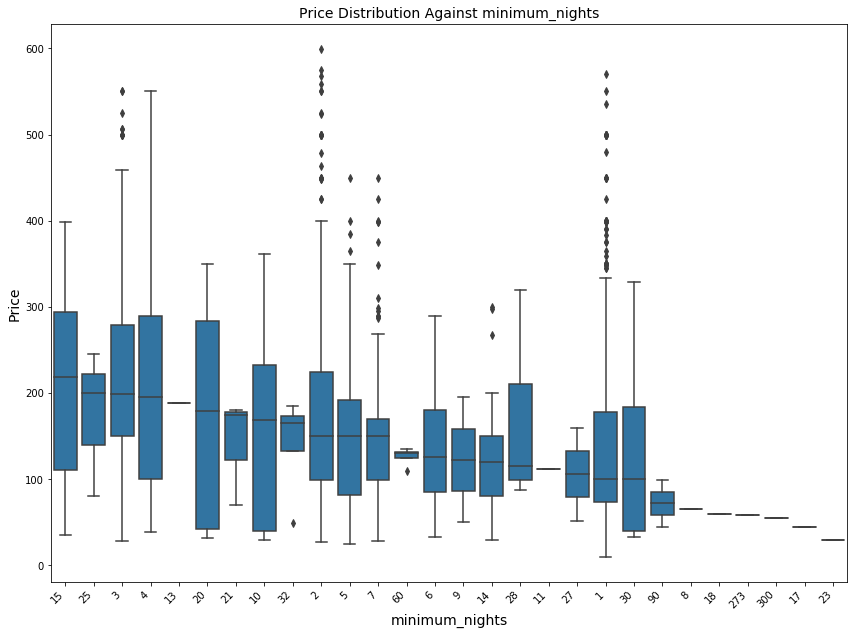

In [167]:
# Price Distribution for minimum nights
plot_price_by_feature('minimum_nights',df = listing);


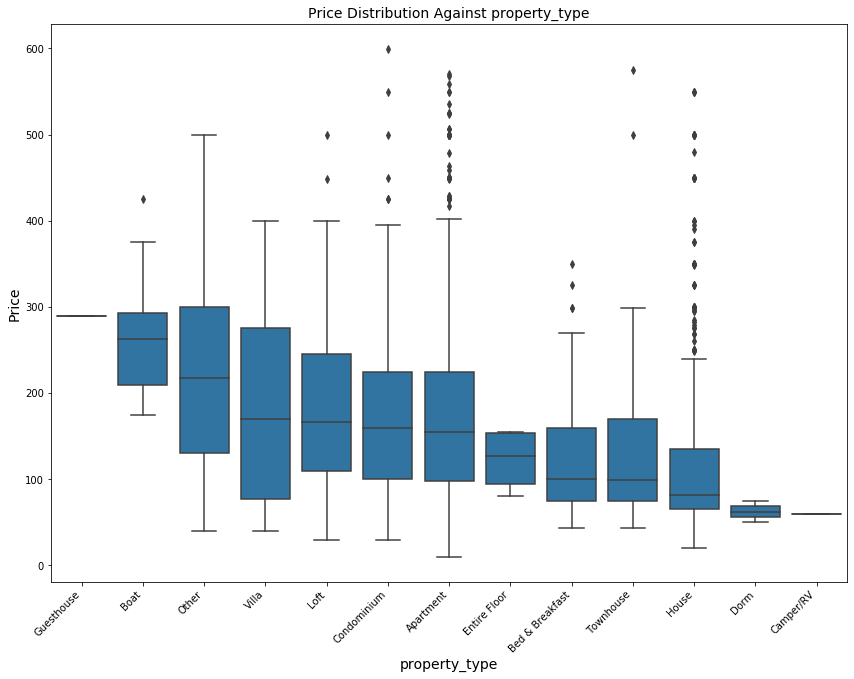

In [168]:
# Price ditribution for property type
plot_price_by_feature('property_type',df = listing);



Naturally the type of residence has a strong effect on price. Note that the vast majority of observations fall into just four categories: House, Apartment, Condominium, and Townhouse, in that order.

The Boat effect is interesting, people are paying a premium to be on the water.

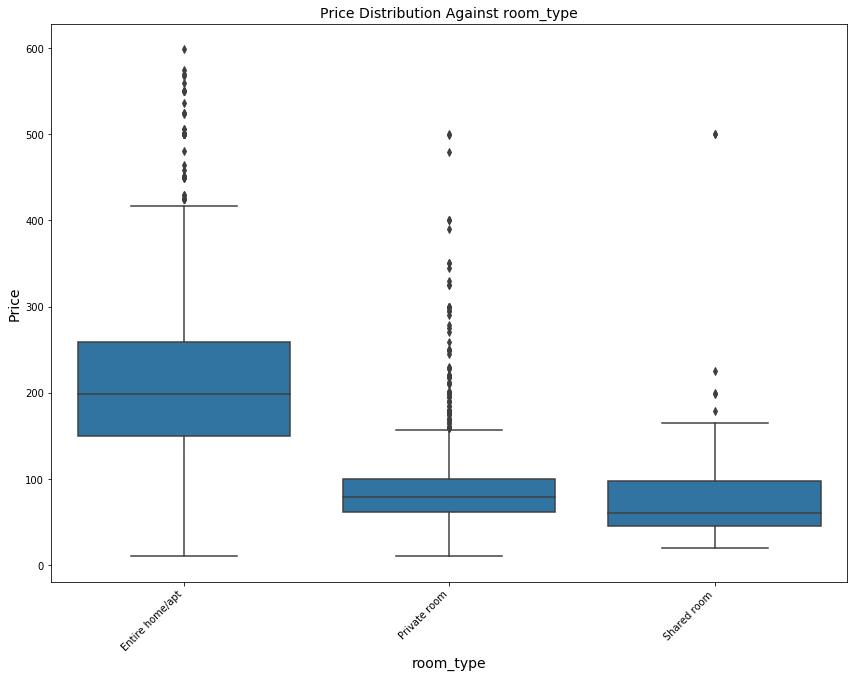

In [169]:
#Price distribution for room type
plot_price_by_feature('room_type',df = listing);

More understandable effects, how many walls you get and whether your bed is real or not.Real bed matters.Median price varies by 50-100 USD from airbed to futon to couch to real bed.

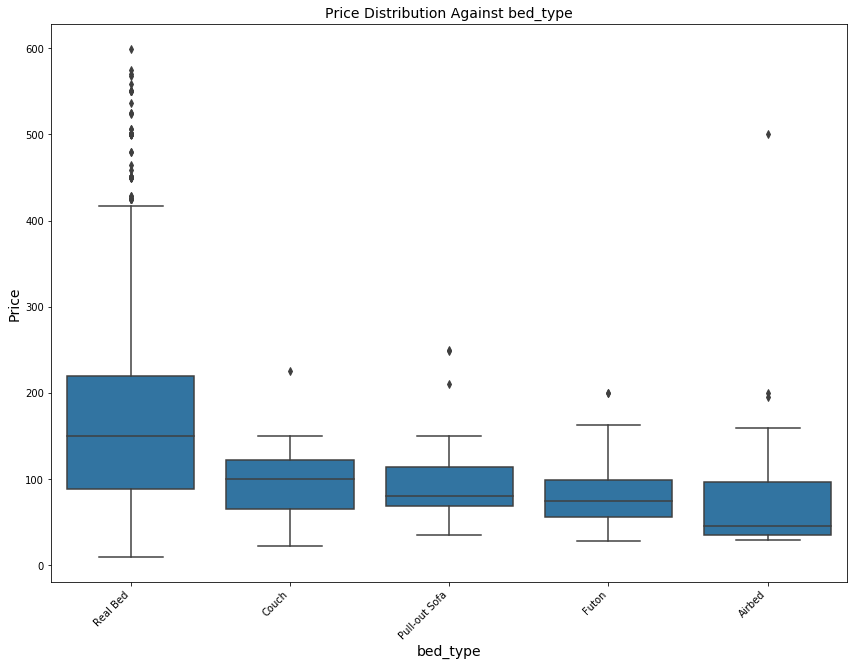

In [170]:
#Price distribution for bed type
plot_price_by_feature('bed_type',df = listing);


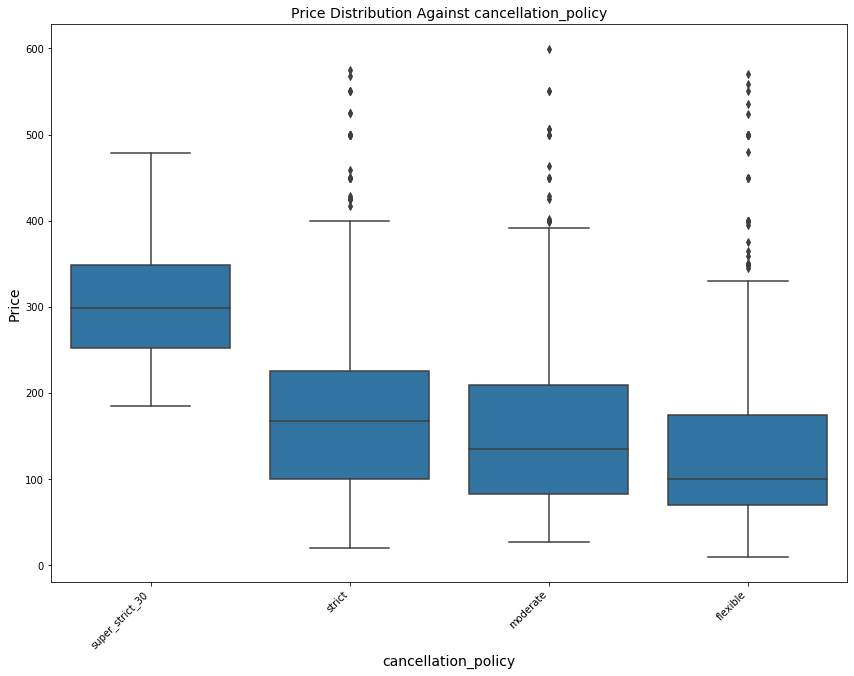

In [171]:
##Price distribution for cancellation policy
plot_price_by_feature('cancellation_policy',df = listing);

As expected, flexible cancellation policy has less median price although it includes outliers ranging from 400-600 USD. Super strict 30 category set prices at 300 USD which is quite high and almost triple of the lowest median price.Even strict cancellation offer around 160 USD median booking price.

Let's take a look at the market in terms of bedrooms and bathroom provided. Below is a heatmap showing the number of BnBs of various Bathroom/Bedroom configurations. Not surprisingly housing availability is clustered around the 1 bed 1 bath, with dorms and such having less and large rentals having more. The vast majority of entities fall into a 0x0-to-2x2 box.

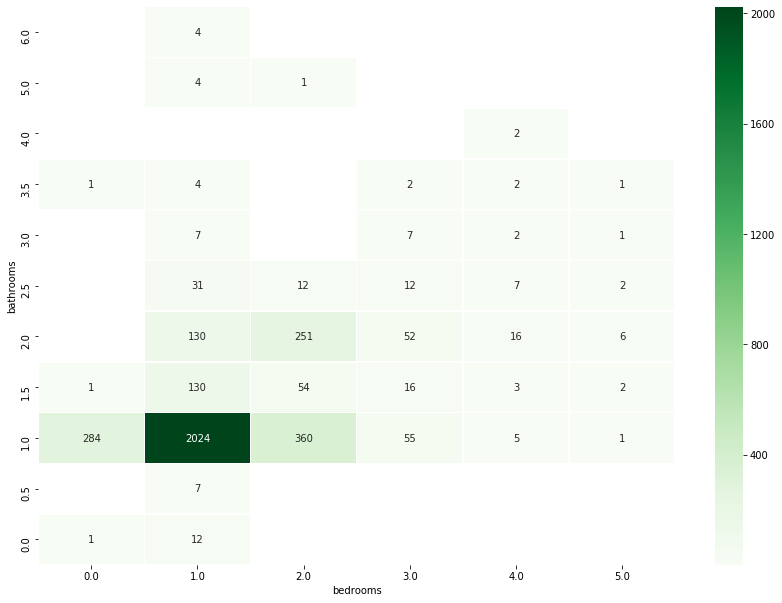

In [154]:
# Distribution for bedrooms and bathrooms combination
plt.figure(figsize = [14.27, 10.27])
sns.heatmap(listing
                .groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Greens", fmt='.0f', annot=True, linewidths=0.5);




And here are the mean prices for each of these configurations. Note that this number should be treated with skepticism in the case of cells with a small number of observations above; anything outside of 0x0-by-2x2 is especially phony-feeling.

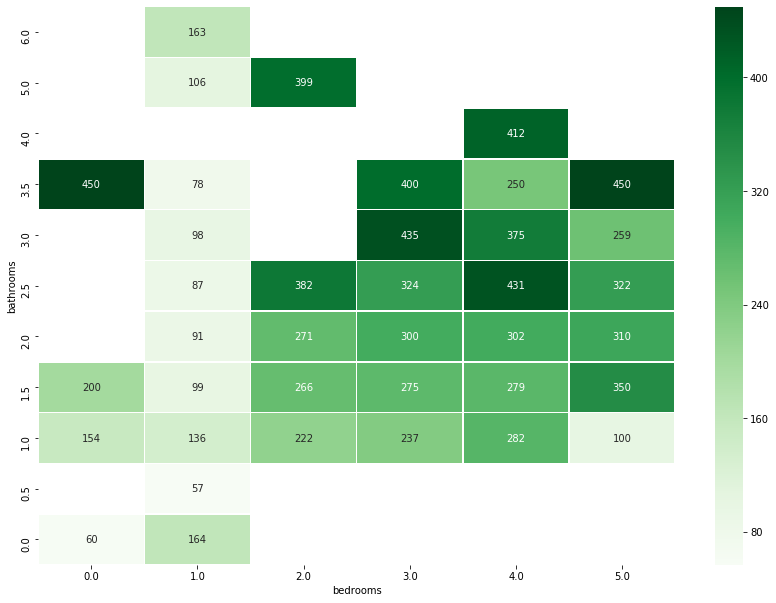

In [162]:
# Price Distribution for bedrooms and bathrooms combination
fig= plt.figure(figsize = [14.27, 10.27])
sns.heatmap(listing
                .groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Greens", fmt='.0f', annot=True, linewidths=0.5);



In [161]:

def bar_plot_price_by_feature(col_name,df = listing,figsize = [14.27, 10.27]):
    """
    This function takes column name and dataframe and returns the price distribution as bar 
    plot against individual value of numerical variable
    
    """
    plt.figure(figsize = figsize)
    base_color = sns.color_palette()[0]
    sort_order = listing.groupby(col_name)['price']\
                    .mean()\
                    .sort_values(ascending=False)\
                    .index               
    sns.barplot(y='price', x=col_name, data=listing, order=sort_order,color = base_color)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title("Price Distribution against {}".format(col_name))
    plt.show()
  

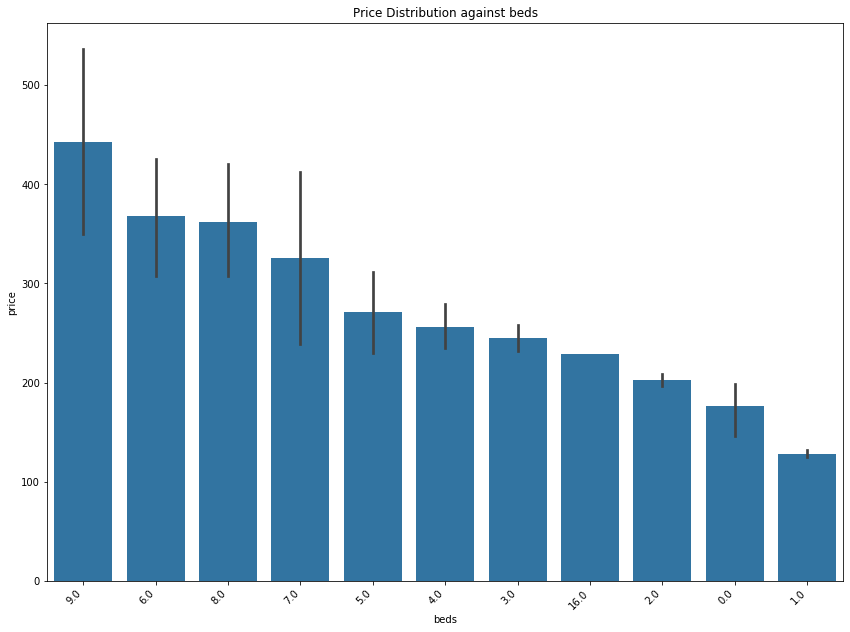

In [172]:
# Price distribution for number of beds
bar_plot_price_by_feature('beds',df = listing)


Surprisingly enough zero beds costs you a premium! BnBs with no real bed seem to be special in some regard, justifying their cost elsewhere.

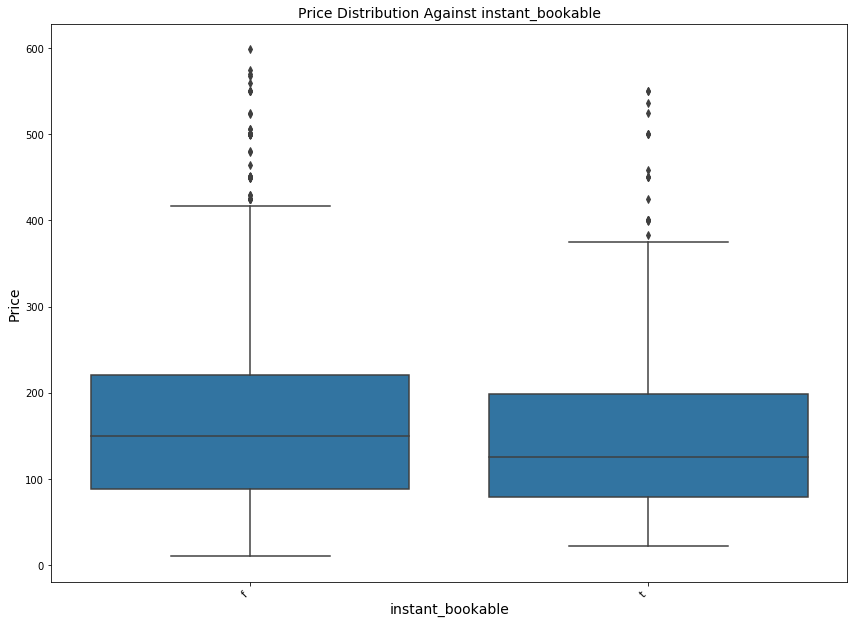

In [174]:
# Price distribution for number of instant_bookable listings

plot_price_by_feature('instant_bookable',df = listing)

Let's dig into amenities and its properties.

In [36]:
# Remove bracket and "" from each listing of amaenities
listing.amenities = listing.amenities.str.replace("[{}]", "")
listing.amenities = listing.amenities.str.replace('"', '')

In [37]:
listing.amenities.head()

0    TV,Wireless Internet,Kitchen,Free Parking on P...
1    TV,Internet,Wireless Internet,Air Conditioning...
2    TV,Cable TV,Wireless Internet,Air Conditioning...
3    TV,Internet,Wireless Internet,Air Conditioning...
4    Internet,Wireless Internet,Air Conditioning,Ki...
Name: amenities, dtype: object

In [40]:
amenity_num = listing.amenities.str.get_dummies(sep = ",")

In [41]:
amenity_num.head()

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
2,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1
3,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0


In [42]:
amenity_num.shape

(3536, 45)

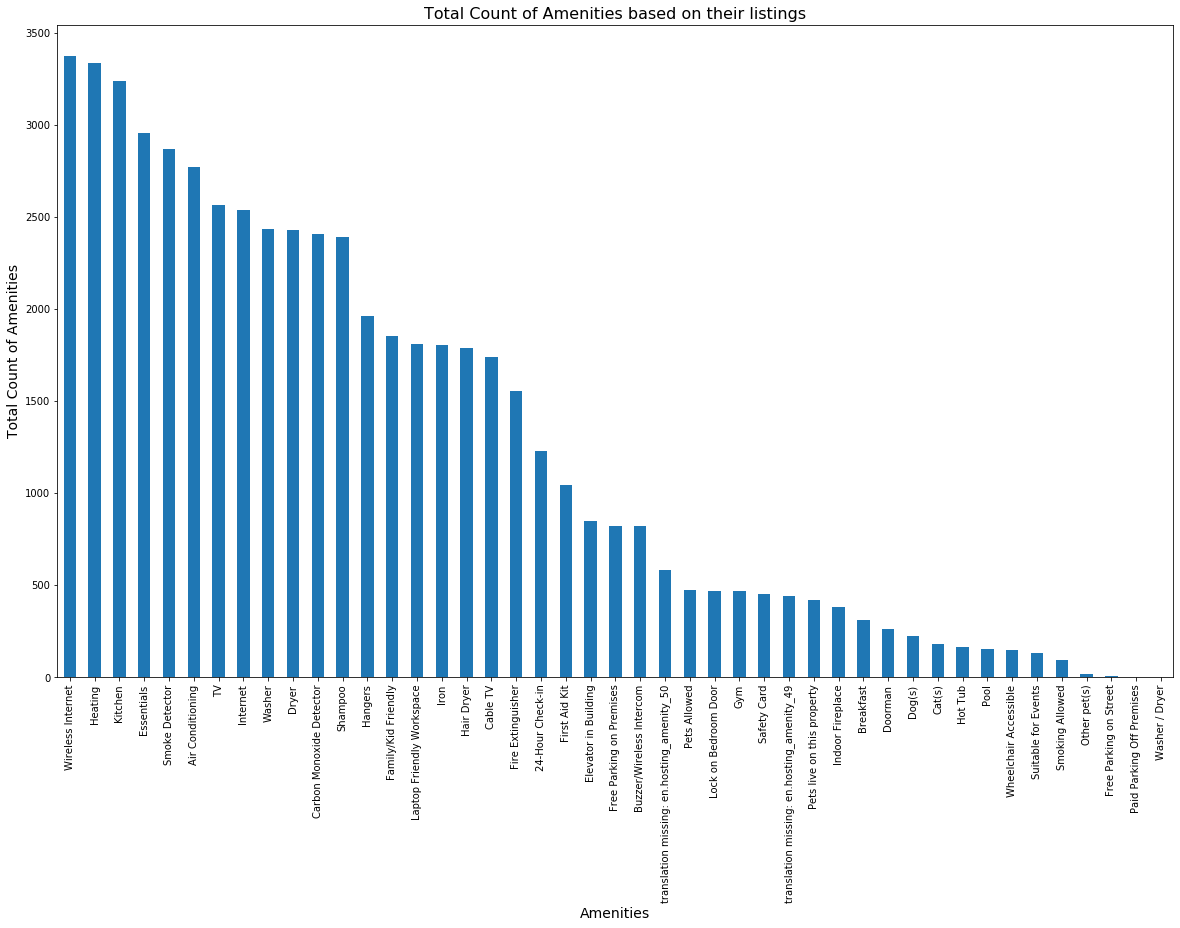

In [43]:
# Find total number of various amenities offerred 
plt.figure(figsize = [20,12])
base_color = sns.color_palette()[0]
amenity_total_count = amenity_num.sum()
amenity_total_count.sort_values(ascending=False).plot(kind = 'bar')
plt.title('Total Count of Amenities based on their listings',fontsize = 16)
plt.xticks(rotation='vertical');
plt.xlabel('Amenities',fontsize = 14 );
plt.ylabel('Total Count of Amenities',fontsize = 14);

The amenities profile certainly portrays the avaiabilty of basic utilities and features those are required for usual living.Heating,air conditioning, wireless internet connection are among them. On the other hand, kitchen,smoke detector,Crbon Monoxide detector,washer,dryer, TV, Internet and essentials are also recorded as mostly featured amenities.The mentioned amenities above are considered to be prime requirement and in most cases they are built in. So, I think the other amenties such as free parking, elevator in the building, 24 hours check in, pets allowed, breakfast, wheelchair accessibility, gym those are not always a priority but nice to have may drive price differently. Let's look at them price wise.

Let's see which amenities are most popular, price-wise.

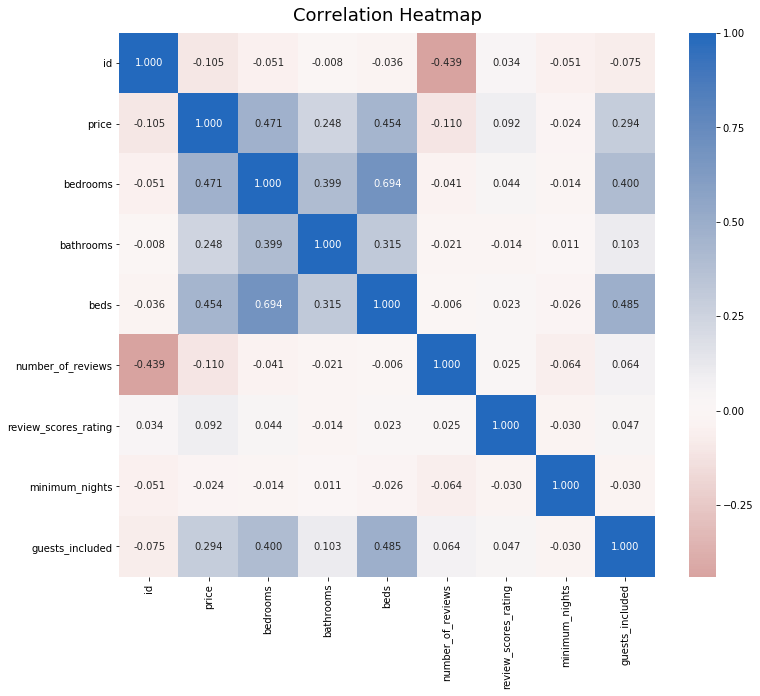

In [175]:
# Create correlation heatmap
plt.figure(figsize = [12,10])
heatmap = sns.heatmap(listing.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()


What the correlation heatmap indicates is that price is moderately correlated by number of beds, bedrooms and bathrooms along with guests included. Other features of our interest plays negetively with price but those are not significant.

# Can you describe the vibe of each Boston neighborhood using listing descriptions?

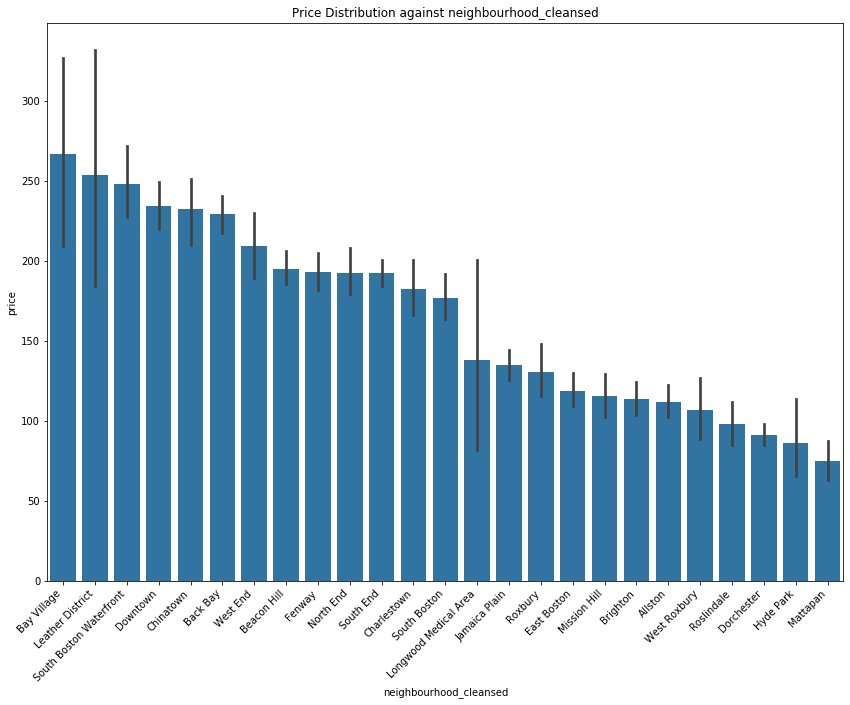

In [176]:
#Price distribution for neighborhood
bar_plot_price_by_feature('neighbourhood_cleansed',df = listing)


Bay Village,Lather District, South Boston Waterfront are top three locations according to average pricing which ranges between USD 250-260.Then Downtown,Chinatown, Back Bay are next three in que and have similar range of average price. Let's explore what amenities or other features influence these areas' listing and popularity.Let's chcek out how many listings are there in individual location.

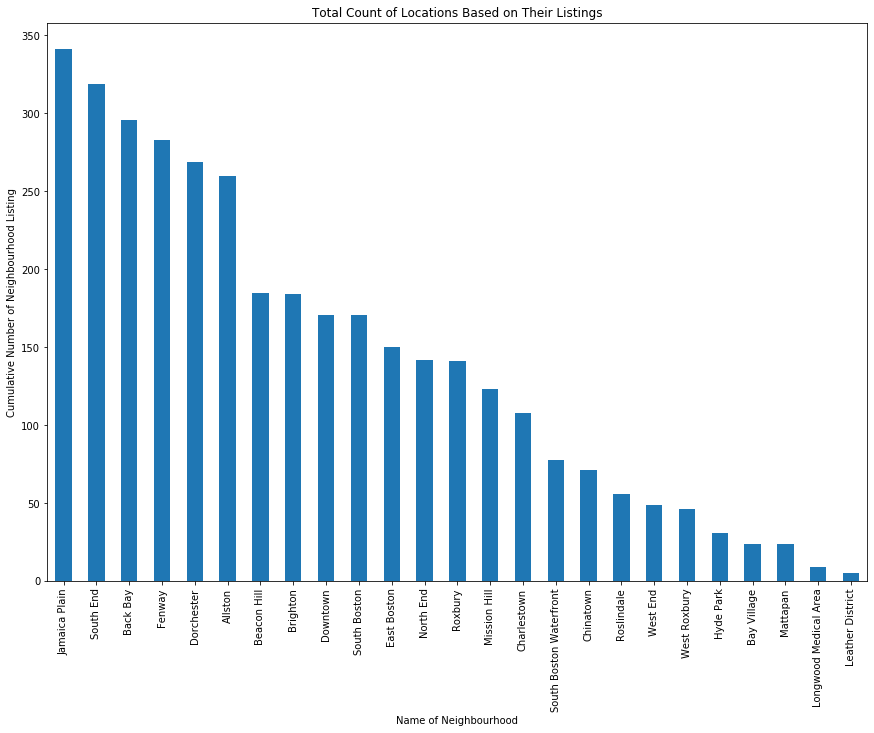

In [178]:
#Total count distribution of neighborhood listing
neighbourhood_listing_count = listing.neighbourhood_cleansed.value_counts()

plt.figure(figsize = [14.7,10.27])
base_color = sns.color_palette()[0]
neighbourhood_listing_count.plot(kind='bar')
plt.title('Total Count of Locations Based on Their Listings')
plt.xticks(rotation='vertical');
plt.xlabel('Name of Neighbourhood');
plt.ylabel('Cumulative Number of Neighbourhood Listing');

## Multivariate Data Analysis

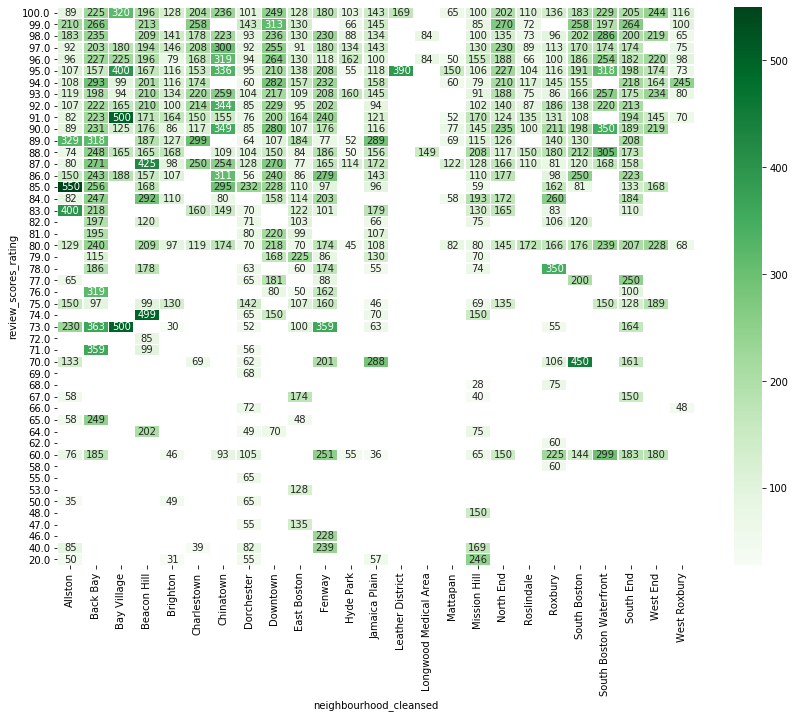

In [179]:
#Reviews and mean price for each neighborhood listing
plt.figure(figsize = [14.27, 10.27])
sns.heatmap(listing
                .groupby(['review_scores_rating','neighbourhood_cleansed'])\
                .mean()['price']\
                .reset_index()\
                .pivot('review_scores_rating','neighbourhood_cleansed','price')\
                .sort_index(ascending=False),
            cmap="Greens", fmt='.0f',annot =True, linewidths=0.5);

In [48]:
listing[['review_scores_rating','price']].describe()

,review_scores_rating,price
count,2741.000000,3536.000000
mean,91.865378,163.675905
std,9.558757,98.379579
min,20.000000,10.000000
25%,89.000000,85.000000
50%,94.000000,149.000000
75%,98.000000,218.250000
max,100.000000,599.000000


In [49]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_y = np.arange(0, 600+50,100)
    bins_x = np.arange(20, 100+10, 10)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

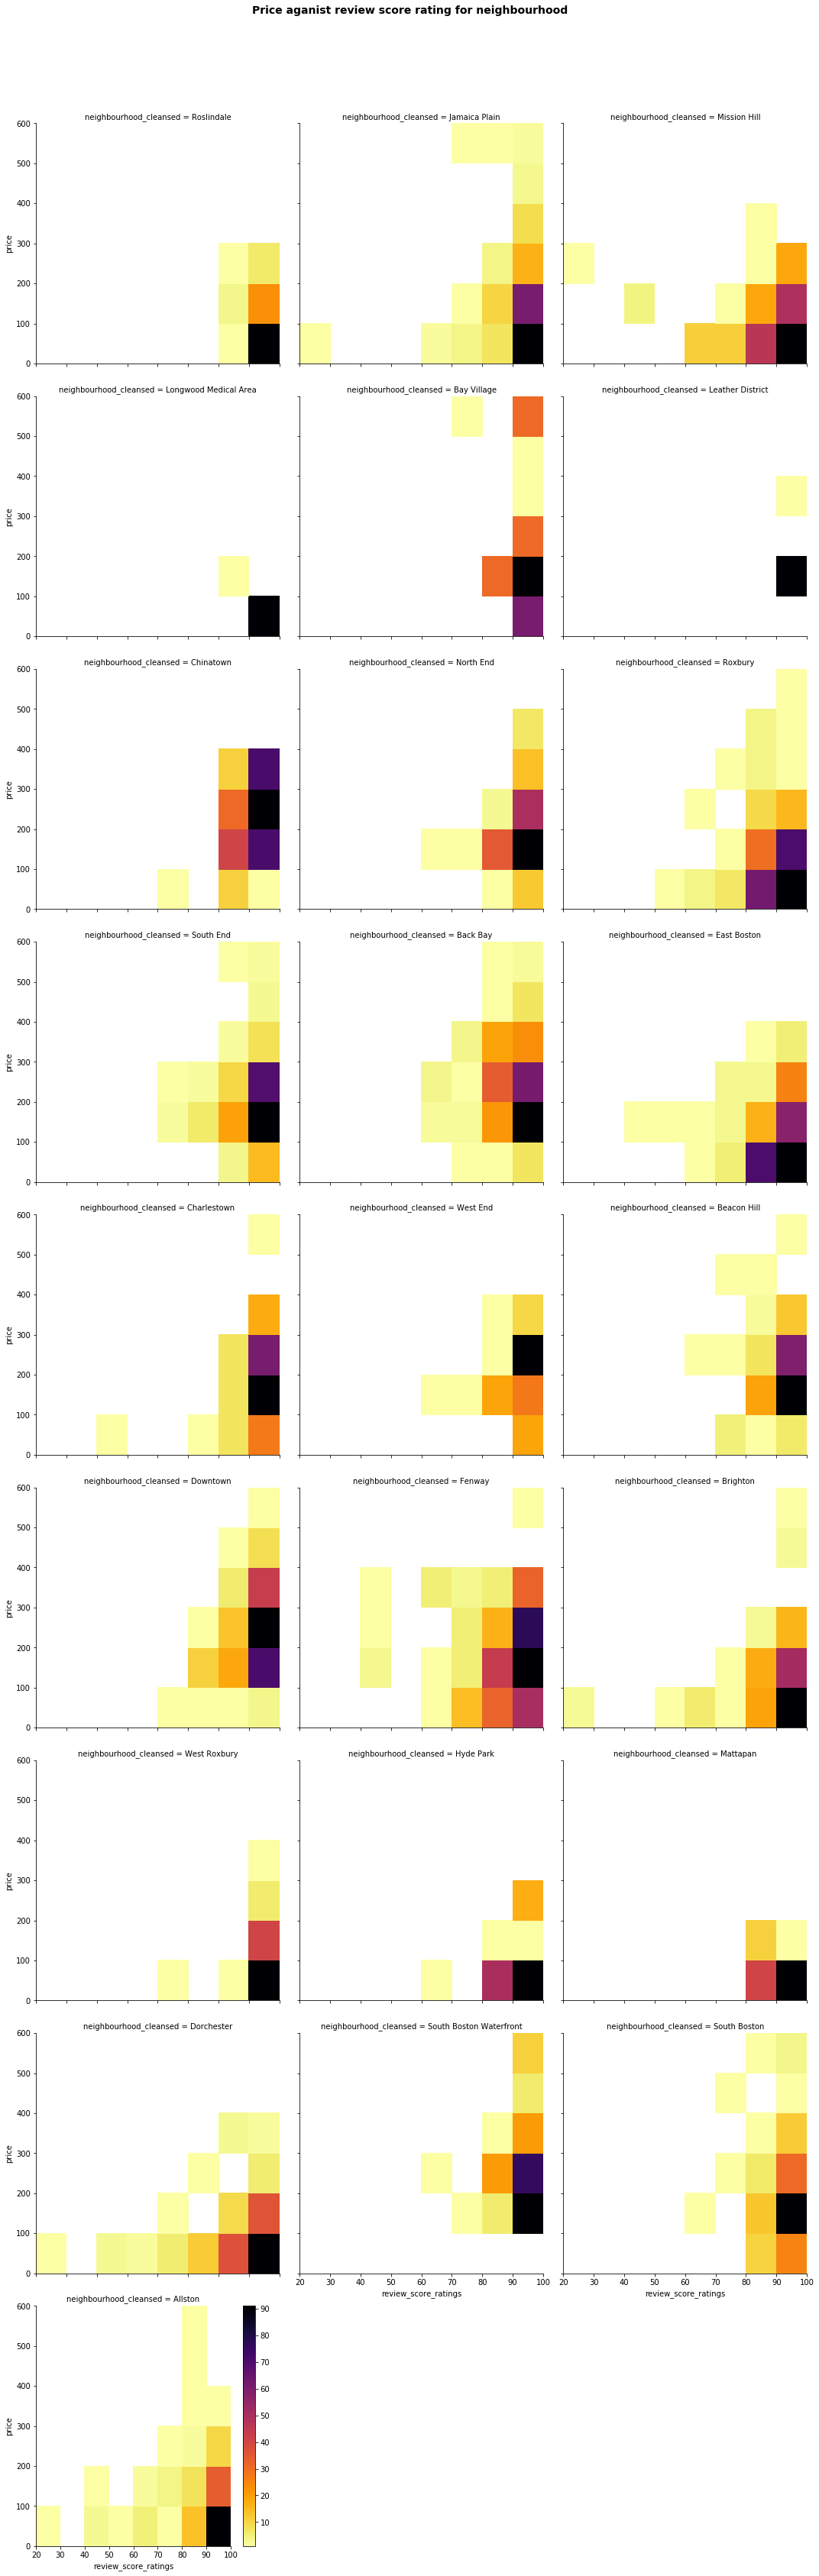

In [50]:
g = sns.FacetGrid(data = listing, col = 'neighbourhood_cleansed', col_wrap = 3, height = 5)
g.map(hist2dgrid,'review_scores_rating','price', annot =True,color = 'inferno_r')
g.set_xlabels('review_score_ratings')
g.set_ylabels('price')
plt.colorbar()
plt.suptitle("Price aganist review score rating for neighbourhood", y = 1.04, fontsize = 14,weight = 'bold')
plt.show();

From both type of plots (heatmap and facetgrid) couple of insights are revealed. 
1. Higher review score ratings are mostly concentrated between 85 and 100. 
2. Most of the neighbourhoods(13) have the review scores between 90-100 for mean price below 100.Around 
   nine neighbourhood locations possess score between 90-100 for price between 200-300.
3. Chinatown is an interesting place and have rating from 80-100 for all of thier listings and cumulative number of listing is large as well.
4. Leather District has only two pricing group but all for high rating.Jamaica plain has a variety of pricing for higher scores. Looks like a suitable place for any guest according to affordability. 

So far the reviews are good for most places. May be amenities, text, summary, neighborhood_overview and other features would also determine the average cost for renting a place. We may have to prepare the text data for processing. For now, in order to get a sense of neighborhood, we will process that column with wordcloud.

# Popular Word and Word Cloud
We want to see that whether different price groups will have different styles of neighbourhood overview. In order to visulize, we will extract the description from the cleaned dataset. And extract the key words to compare the differences.

## Popular words

In [180]:
# Extract the dataframe for word analysis
df_word = listing[['neighborhood_overview', 'price']].reset_index()
df_word.head(5)

,index,neighborhood_overview,price
0,0,"Roslindale is quiet, convenient and friendly. ...",250.0
1,1,"The room is in Roslindale, a diverse and prima...",65.0
2,2,The LOCATION: Roslindale is a safe and diverse...,65.0
3,3,Roslindale is a lovely little neighborhood loc...,75.0
4,4,"I love the proximity to downtown, the neighbor...",79.0


There are many missing values in neighborhood_overview column. It does not make sense to impute text value specially when it is a review or description.So we will drop them otherwise, there might be biased included in our results.

In [181]:
df_word.isnull().values.sum()

1398

In [182]:
df_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 3 columns):
index                    3536 non-null int64
neighborhood_overview    2138 non-null object
price                    3536 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 83.0+ KB


In [183]:
df_word.dropna(axis=0, how='any', inplace = True)

In [184]:
df_word.shape

(2138, 3)

In [185]:
# segment price into two groups 
bin_edges = [0, 84, 145, 205, 417]
bin_name = ['25%', '50%', '75%', '100%']
df_word['price_bin'] = pd.cut(df_word['price'], bins=bin_edges, labels=bin_name)

In [186]:
# get the post content for each price group
p_words = {};
for i in range(len(bin_name)):
    p_words[i] = ''
    df_i = df_word[df_word['price_bin'] == bin_name[i]]['neighborhood_overview'].astype(str)
    for j in range(len(df_i)):
        words = df_i.iloc[j].split(' ')
        for word in words:
            p_words[i] += word+' '

In [187]:
# Get the most popular 25 words for each price group 
from collections import Counter
import string
counter = {}
occur = {}
stop_words = ['a', 'the', 'and', 'is', 'of', 'with', '', 'in', 'i', 'you', 'for', 'on', 'at', 'this', 'there', 
              'that', 'to', 'from', 'have', 'has', 'we', 'your', 'my', 'are', 'be', 'or', 'will', 'our', 'it',
             'located', 'all', 'as','also','very','its','one','by']
for i in range(len(bin_name)):
    words = p_words[i].lower().translate(str.maketrans('', '', string.punctuation)).split(' ')
    counter[i] = Counter([word for word in words if word not in stop_words])
    occur[i] = counter[i].most_common(25)
    
df1 = pd.DataFrame.from_dict(occur[0]).rename(columns={0:'word', 1:'count'})
df2 = pd.DataFrame.from_dict(occur[1]).rename(columns={0:'word', 1:'count'})
df3 = pd.DataFrame.from_dict(occur[2]).rename(columns={0:'word', 1:'count'})
df4 = pd.DataFrame.from_dict(occur[3]).rename(columns={0:'word', 1:'count'})

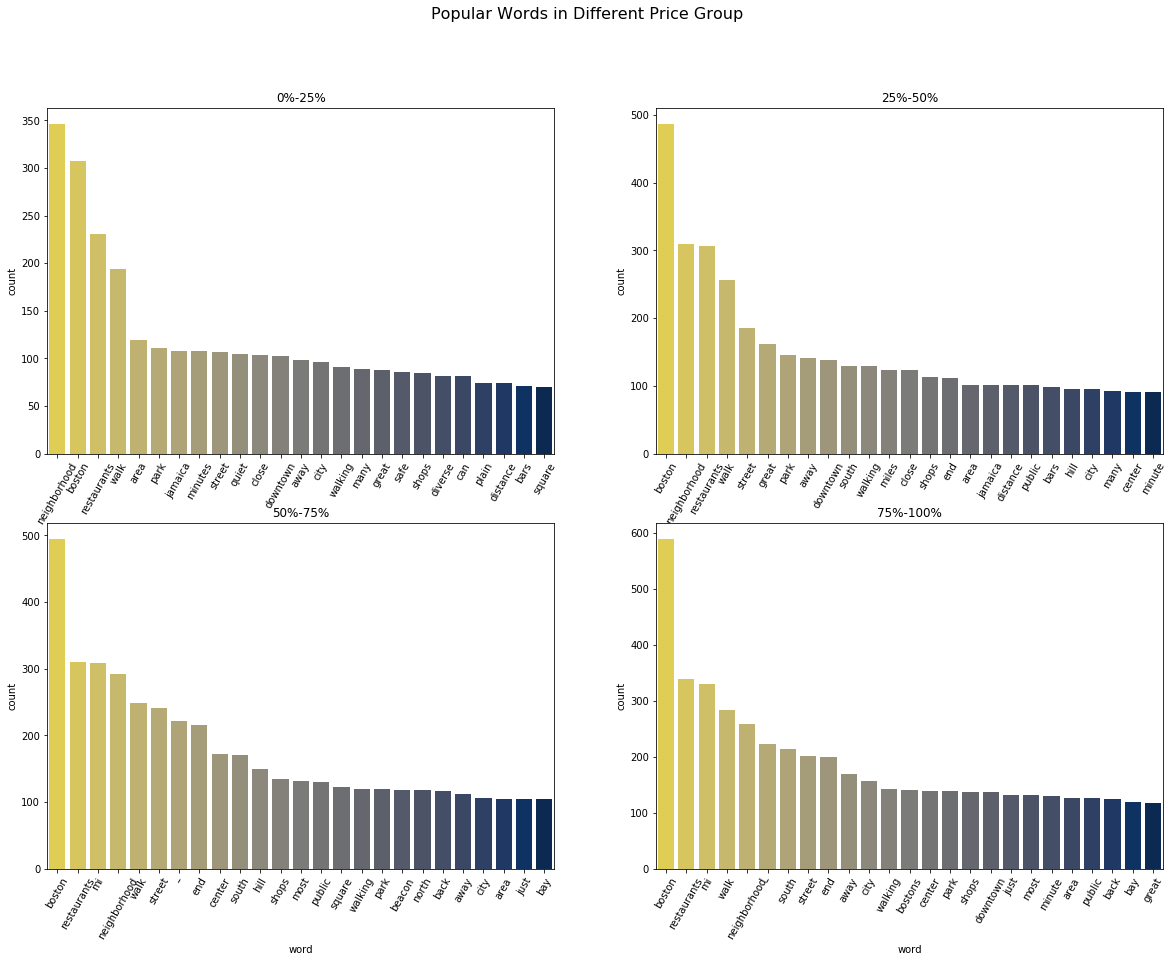

In [188]:
# visualization 
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
ax1 = sns.barplot(data=df1, x='word', y='count', palette = 'cividis_r')
plt.xticks(rotation=60)
plt.xlabel('')
plt.title('0%-25%', fontsize=12);

plt.subplot(2, 2, 2)
ax2 = sns.barplot(data=df2, x='word', y='count', palette = 'cividis_r')
plt.xticks(rotation=60)
plt.xlabel('')
plt.title('25%-50%', fontsize=12)

plt.subplot(2, 2, 3)
ax2 = sns.barplot(data=df3, x='word', y='count', palette = 'cividis_r')
plt.xticks(rotation=60)
plt.title('50%-75%', fontsize=12)

plt.subplot(2, 2, 4)
ax2 = sns.barplot(data=df4, x='word', y='count', palette = 'cividis_r')
plt.xticks(rotation=60)
plt.title('75%-100%', fontsize=12)

plt.suptitle('Popular Words in Different Price Group', fontsize = 16);

# Word Cloud
Word Cloud is another way to look at the key words. It will generate a image of the key words which is very cool!

In [61]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(stop_words)

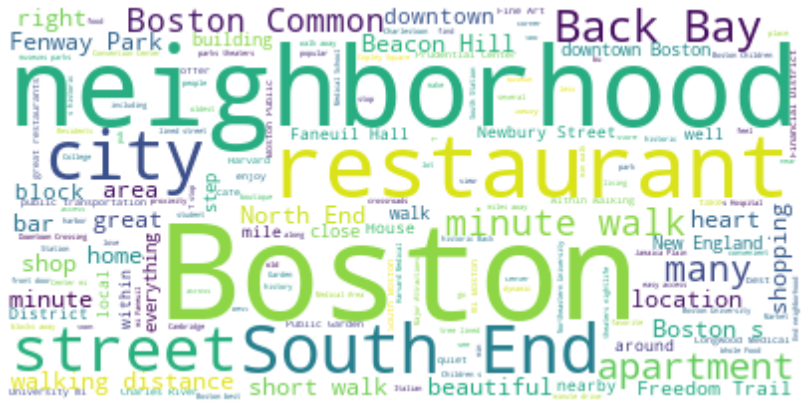

In [108]:
# generate word cloud for high price group
wordcloud = WordCloud(background_color='white', max_words=1000, contour_width=3,contour_color='firebrick', 
                      stopwords = stopwords)

wordcloud.generate(p_words[3])
fig = plt.figure(figsize=(14.27, 10.27))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

fig.savefig('wordcloud.png', bbox_inches='tight')

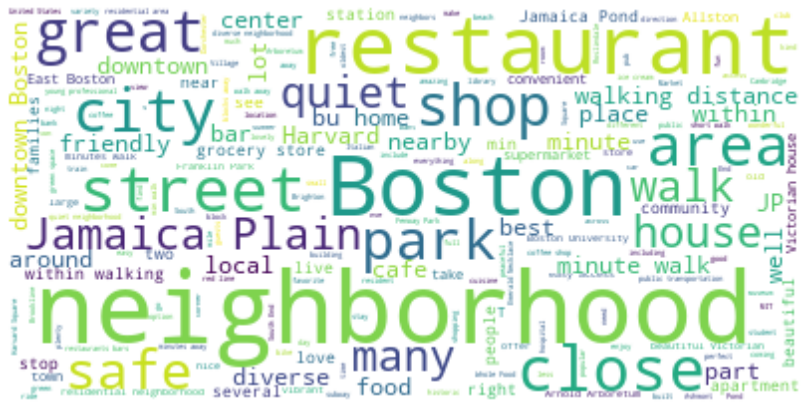

In [109]:
# generate word cloud for lower price group
wordcloud = WordCloud(background_color='white', max_words=1000, contour_width=3,contour_color='firebrick', 
                      stopwords = stopwords)

wordcloud.generate(p_words[0])
fig = plt.figure(figsize=(14.27, 10.27))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig('wordcloud_lowest.png', bbox_inches='tight')

## Findings

1. Obviously two price zone offer different vibes. For lower price Jamaica Plain could be considered as popular place to choose.This is also evident in our previous analysis of price vs total number of reviews_scores_rating. Jamaica plain has diverse range of listing availability and affordable pricing. This area is also safe and community has a well balanced cultural blend. From both wordclouds, restaurant is a extensively used phrase to attract travelers and that is quite understandable. You may have to well advertise for your listing to get customers and better earning too.

2. For higher price worldcloud, definitely Bay Village is expensive along with Fenway Park, South End and other areas. This is again proved from this cloud. Another important thing is that type of listing are mostly apartments whereas in lower price zone it was house. 

# What are the busiest times of the year to visit Boston? By how much do prices spike?

In order to check how the AirBnB business and popularity among guests have grown over time with avaiable data, we can explore the df_calendar dataframe. 

In [189]:
df_calendar.head(10)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


In [190]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [191]:
df_calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [192]:
df_calendar.nunique()

listing_id    3585
date           365
available        2
price         1246
dtype: int64

In [193]:
df_calendar.max(),df_calendar.min()

(listing_id      14933461
 date          2017-09-05
 available              t
 dtype: object, listing_id          3353
 date          2016-09-06
 available              f
 dtype: object)

In [194]:
df_calendar.price.describe()

count      643037
unique       1246
top       $150.00
freq        20752
Name: price, dtype: object

## Observations
1. We have 365 unique days from 2016-09-06 to 2017-09-05. Data type is object which we can convert to datetime.
2. Price column has $ sign infront of the figures which is also should be float format.
3. Availability are t or f (true, false) needs to be in boolean expression.
4. Price column also has missing values by a lot but our concern at this moment is availabilty which corresponds to business around the year.

In [216]:
# str to datetime
to_datetime = lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d')
# str to float type and remove sign
def remove_sign(x,sign):
    """
    This function takes any variable value that has character/sign and remove them 
    and return it as float type.
    """
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x
     
    
                                                                  

In [196]:
# clean calendar data
## change column 'date' data type from 'object' to 'datetime'
df_calendar['date'] = df_calendar['date'].apply(to_datetime)
## remove '$' sign from price
df_calendar.price = df_calendar.price.apply(remove_sign,sign='$')
df_calendar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null datetime64[ns]
available     1308890 non-null object
price         643037 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 39.9+ MB


In [197]:
# total number of available home each day
avaliable_count = df_calendar.groupby('date').apply(lambda x: x.notnull().sum())[['price']]
# change column name
avaliable_count = avaliable_count.rename({"price":"total_available_houses"},axis='columns')

In [198]:
# everyday average prices
df_calendar_open = df_calendar[df_calendar.price.notnull()]
# average house price for boston everyday
average_price = df_calendar_open.groupby('date').mean()[['price']]
# change column name
average_price = average_price.rename({"price":"average_prices"},axis='columns')

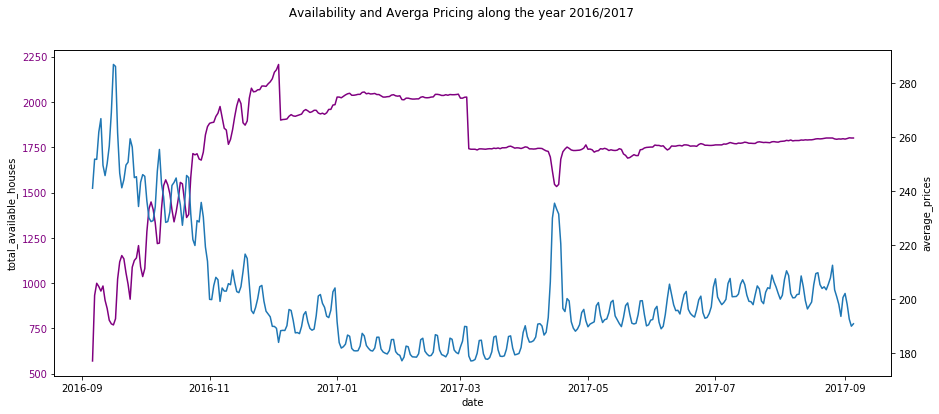

In [201]:
# plot total available houses and average prices in one figure
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = avaliable_count.index,y = 'total_available_houses', 
                  data = avaliable_count,color="purple",legend=False)
for tl in ax.get_yticklabels():
    tl.set_color('purple')

ax2 = ax.twinx()
plt2 = sns.lineplot(x = average_price.index,y = 'average_prices',
             data=average_price,ax=ax2,linestyle=':', legend=False)
plt.suptitle(" Availability and Averga Pricing along the year 2016/2017")
f.savefig('BusinessTrend',bbox_inches='tight')



## Findings

1. Rental availability is not stable all year round. From Septemper to November, availability increases .It remains relatively stable from 01/2017-09/2017, although the reason why there are two sudden drop of home supply is unclear.
2. Price drops as home supply increases from 09/2016 to 12/2016. The sudden drop of supply in 03/2017 dose not drive price up;However the sudden drop of supply before 05/2017 just rocket price up. So I guess it has something to do with demand change.
3. There seems to have a small periodical price moving circle and this maybe correspond to weekends.

The sudden drop of suply and spike in price may indicate a special event or any famous and popular activity going on around. This might be a reason for that. Let's take a closer look at the date.

In [202]:
# Find out the odd price hike
average_price_sub = average_price[average_price.index > '2017-03-1']
average_price_sub[average_price_sub.average_prices == max(average_price_sub.average_prices)]

,average_prices
date,
2017-04-15,235.501618


After googling, I found that on that particular date Boston Marathon was held which certainly did draw a lot of tourists in town. So, no surprise why the price went up.

# Modeling Price
Since we have explored many features and their effects on pricing, we can model the pricing also based on our features of interest(FOI) those are crucial according to our opinion and primary EDA. Ofcourse this step may not bring the most accurate pricing model but we can start with our selected features anyway.The FOIs are some of the columns form the original dataset along with some of the new columns with categorical values created from the amenities. Let's check if there is any missing or NAN values and drop them or impute with mean for better prediction and not to overgeneralize.



In [203]:
frames = [listing, amenity_num]

In [204]:
df_new = pd.concat(frames, axis = 1)

In [205]:
df_new.head()

,id,price,neighbourhood_cleansed,bedrooms,bathrooms,beds,property_type,bed_type,room_type,name,summary,amenities,number_of_reviews,review_scores_rating,neighborhood_overview,minimum_nights,cancellation_policy,guests_included,instant_bookable,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,12147973,250.0,Roslindale,2.0,1.5,3.0,House,Real Bed,Entire home/apt,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...","{TV,""Wireless Internet"",Kitchen,""Free Parking ...",0,NaN,"Roslindale is quiet, convenient and friendly. ...",2,moderate,1,f,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,3075044,65.0,Roslindale,1.0,1.0,1.0,Apartment,Real Bed,Private room,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,"{TV,Internet,""Wireless Internet"",""Air Conditio...",36,94.0,"The room is in Roslindale, a diverse and prima...",2,moderate,0,t,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
2,6976,65.0,Roslindale,1.0,1.0,1.0,Apartment,Real Bed,Private room,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",41,98.0,The LOCATION: Roslindale is a safe and diverse...,3,moderate,1,f,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1
3,1436513,75.0,Roslindale,1.0,1.0,2.0,House,Real Bed,Private room,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1,100.0,Roslindale is a lovely little neighborhood loc...,1,moderate,2,f,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0
4,7651065,79.0,Roslindale,1.0,1.5,2.0,House,Real Bed,Private room,Come Home to Boston,"My comfy, clean and relaxing home is one block...","{Internet,""Wireless Internet"",""Air Conditionin...",29,99.0,"I love the proximity to downtown, the neighbor...",2,flexible,1,f,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0


For now we will drop few columns such as amenities, name, summary and check if there is any null value on Nan values in the existing columns

In [206]:
# check dtypes and missing info
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3584
Data columns (total 64 columns):
id                                            3536 non-null int64
price                                         3536 non-null float64
neighbourhood_cleansed                        3536 non-null object
bedrooms                                      3526 non-null float64
bathrooms                                     3522 non-null float64
beds                                          3527 non-null float64
property_type                                 3533 non-null object
bed_type                                      3536 non-null object
room_type                                     3536 non-null object
name                                          3536 non-null object
summary                                       3394 non-null object
amenities                                     3536 non-null object
number_of_reviews                             3536 non-null int64
review_scores_rating

In [207]:
# Check the missing values in each columns and find the right way to imput them.
df_new.isnull().sum()[df_new.isnull().sum()>0]

bedrooms                   10
bathrooms                  14
beds                        9
property_type               3
summary                   142
review_scores_rating      795
neighborhood_overview    1398
dtype: int64

In [208]:
# Drop columns those are not FOI at this moment
df_new.drop(columns = ['id','name','summary','amenities','neighborhood_overview'], inplace = True)

In [209]:
#Creating a new dataframe which is a subset of categorical columns of out df_new dataframe
cat_cols = df_new.select_dtypes(include=['object'])

In [210]:
cat_cols.head()

,neighbourhood_cleansed,property_type,bed_type,room_type,cancellation_policy,instant_bookable
0,Roslindale,House,Real Bed,Entire home/apt,moderate,f
1,Roslindale,Apartment,Real Bed,Private room,moderate,t
2,Roslindale,Apartment,Real Bed,Private room,moderate,f
3,Roslindale,House,Real Bed,Private room,moderate,f
4,Roslindale,House,Real Bed,Private room,flexible,f


In [211]:
# Making new columns from categorical variables in order to use these features in ML regression algoritm.
for col in cat_cols:
    try:
        df_new = pd.concat([df_new.drop(col, axis=1), pd.get_dummies(df_new[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    except:
        continue

In [212]:
df_new.head()

,price,bedrooms,bathrooms,beds,number_of_reviews,review_scores_rating,minimum_nights,guests_included,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,instant_bookable_t
0,250.0,2.0,1.5,3.0,0,NaN,2,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,65.0,1.0,1.0,1.0,36,94.0,2,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
2,65.0,1.0,1.0,1.0,41,98.0,3,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
3,75.0,1.0,1.0,2.0,1,100.0,1,2,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0
4,79.0,1.0,1.5,2.0,29,99.0,2,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [213]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3584
Data columns (total 99 columns):
price                                             3536 non-null float64
bedrooms                                          3526 non-null float64
bathrooms                                         3522 non-null float64
beds                                              3527 non-null float64
number_of_reviews                                 3536 non-null int64
review_scores_rating                              2741 non-null float64
minimum_nights                                    3536 non-null int64
guests_included                                   3536 non-null int64
24-Hour Check-in                                  3536 non-null int64
Air Conditioning                                  3536 non-null int64
Breakfast                                         3536 non-null int64
Buzzer/Wireless Intercom                          3536 non-null int64
Cable TV                                   

In order to properly model, we need to check the missing values and impute the mean, mode or 0, depending on the variable. While doing so, we must be avoid dilution of the predictive power of the machine learning model, as it can lead to overgeneralization. 

In [214]:
# Check the missing values in each columns and find the right way to imput them.
df_new.isnull().sum()[df_new.isnull().sum()>0]

bedrooms                 10
bathrooms                14
beds                      9
review_scores_rating    795
dtype: int64

There are 795 missing review scores rating which is almost 22% of the data and I think droping the rows associated with them can contain sensitive.A quick removal of the rows or columns associated with these missing values would remove missing data that could be used to better inform models. Impute the mean of a column is one of the most common ways to work with missing value and it can help to perform better prediction. So we will follow that path.

In [215]:
#bathrooms imput NaN with mean
df_new['bathrooms'].mean()
df_new['bathrooms'] = df_new['bathrooms'].fillna((df_new['bathrooms'].mean()))

In [89]:
#bedrooms imput NaN with mean
df_new['bedrooms'].mean()
df_new['bedrooms'] = df_new['bedrooms'].fillna((df_new['bedrooms'].mean()))

In [90]:
#beds imput NaN with mean
df_new['beds'].mean()
df_new['beds'] = df_new['beds'].fillna((df_new['beds'].mean()))

In [91]:
#review_scores_rating imput NaN with mean
df_new['review_scores_rating'].mean()
df_new['review_scores_rating'] = df_new['review_scores_rating'].fillna((df_new['review_scores_rating'].mean()))

In [92]:
#now check the datatypes
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3584
Data columns (total 99 columns):
price                                             3536 non-null float64
bedrooms                                          3536 non-null float64
bathrooms                                         3536 non-null float64
beds                                              3536 non-null float64
number_of_reviews                                 3536 non-null int64
review_scores_rating                              3536 non-null float64
minimum_nights                                    3536 non-null int64
guests_included                                   3536 non-null int64
24-Hour Check-in                                  3536 non-null int64
Air Conditioning                                  3536 non-null int64
Breakfast                                         3536 non-null int64
Buzzer/Wireless Intercom                          3536 non-null int64
Cable TV                                   

In [93]:
#Creating the X (feautures) and y (the variable to be modelled) dataframes
y = df_new['price']
X = df_new.drop(columns='price')

In [94]:
#Splitting the new dataframes into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [95]:
#Applying the linear regression, fitting the model, making predictions with the test set and scoring the success of the model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
test_score = r2_score(y_test, y_test_preds)
print(test_score)

0.6406566334013228


The R squared value of our model is 0.64. It means that a full 64% of the variation of property price is explained by our model.

It is important to note that we strictly circled our model features to property type, amenities, location, and we did not take into account many other crucial features such as peak seasons and or other pricing and host type, to name a few. However, our model was still able to account for a 2/3rd of price variations.

In [96]:
#Below function is taken from one of the Udacity jupyter notebook examples. I used this code to see coefficients of my model. 
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

In [97]:
coef_df.head(15)

,est_int,coefs,abs_coefs
64,neighbourhood_cleansed_Leather District,98.534529,98.534529
77,property_type_Boat,93.146704,93.146704
78,property_type_Camper/RV,-86.919336,86.919336
53,neighbourhood_cleansed_Bay Village,76.614960,76.614960
52,neighbourhood_cleansed_Back Bay,70.108531,70.108531
85,property_type_Other,69.654979,69.654979
93,room_type_Shared room,-68.942679,68.942679
96,cancellation_policy_super_strict_30,68.712248,68.712248
59,neighbourhood_cleansed_Downtown,60.253605,60.253605
54,neighbourhood_cleansed_Beacon Hill,59.462833,59.462833


In [98]:
print(coef_df.iloc[5:70,:])

                                est_int      coefs  abs_coefs
85                  property_type_Other  69.654979  69.654979
93                room_type_Shared room -68.942679  68.942679
96  cancellation_policy_super_strict_30  68.712248  68.712248
59      neighbourhood_cleansed_Downtown  60.253605  60.253605
54   neighbourhood_cleansed_Beacon Hill  59.462833  59.462833
..                                  ...        ...        ...
7                      24-Hour Check-in  -5.882385   5.882385
48                Wheelchair Accessible   5.819108   5.819108
43                      Smoking Allowed  -5.808466   5.808466
97                   instant_bookable_t  -5.719514   5.719514
83                  property_type_House   5.633424   5.633424

[65 rows x 3 columns]


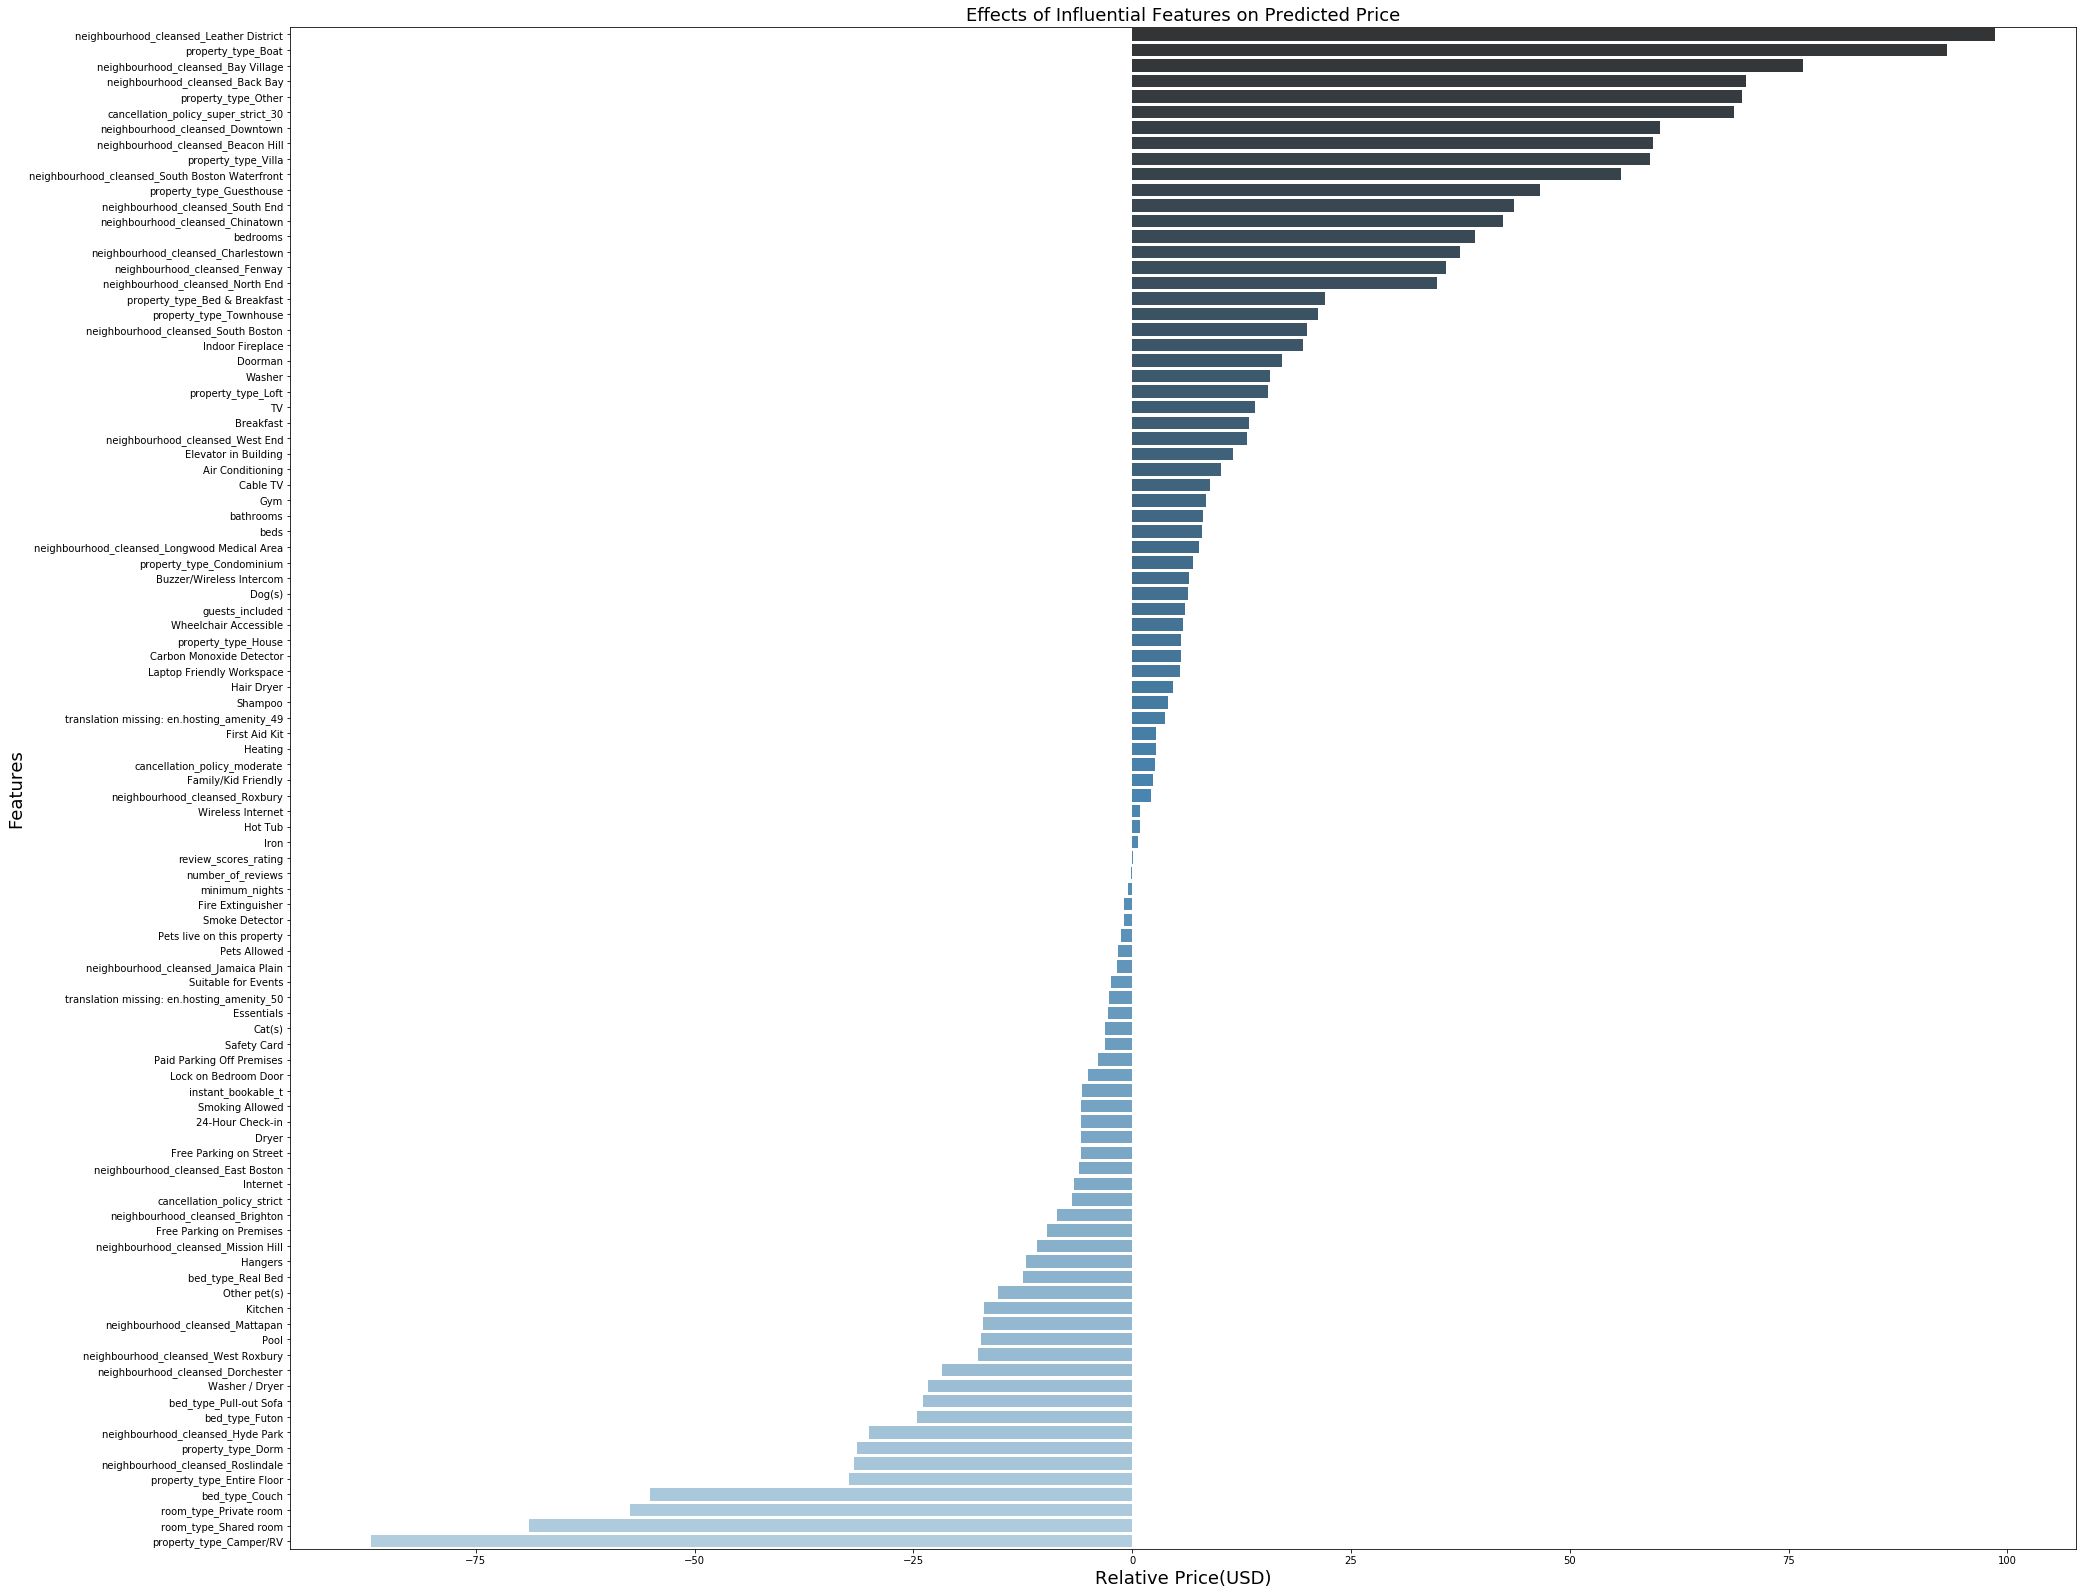

In [106]:
# Visualize Influential Features' effect on price
fig = plt.figure(figsize=(32,28))
sns.barplot(data=coef_df.sort_values(by='coefs', ascending=False), x ='coefs', y ='est_int', palette='Blues_d')
plt.xlabel('Relative Price(USD)', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title('Effects of Influential Features on Predicted Price', fontsize=18);

fig.savefig('RelativePrice.png',bbox_inches='tight')

## Findings

There is no doubt that relative price is mostly driven by location and the closer the neighborhood is to the Boston City center, the most expensive it is. It is surely backed by the fact is that most attractions, activities and business centers are revolving around city. So, the minute you want to save by staying closer to city center makes sense. Even if you want to spend some extra dollar for that. Main findings from these price modelling are descbribed below.

1. Neighbourhood matters. Leather District shows that you can ask for extra 100 dollar per night stay. On the other hand, if you go far from city and love to stay in a queit residential area with decent public transportation and other facilties, Jamaica Plain could be a very good deal for you. 
2. To name other influential features, Property type such as villa, guesthouse, boat(which is quite exotic and sounds premium) may offer unique experiences with additional bucks.
3. Number of bedrooms plays an important role in figuring out how you can set your price for sure. For an additional bedrooms, you can ask for 39.2 dollars more while each additional bathroom will cost extra 8.04 dollars.
4. Number of beds does not add that must cost though. Bed Type can change the pricing though .Pull out sofa, Futon, Couch can save a guest upto 53 dollars than average price.
5. Room type private or shared doesn't matter. Pricing is on the lower side for those two features.
6. Cancellation policy also impacts on pricing. If moderate, a slight positive change can occurr in pricing. If strict, guest gets the benifit of saving few bucks.

7. Now look at the amenities. Wheelchair access,Washer, Wireless Intercom,Elevator in the building, Gym,Indoor Fireplace, TV, Breakfast,Cable TV, Dogs are top amenities for those price go up. It is great to have accessibilty for everyone.
8. Apperantly number of reviews and review score ratings do not play significant role in pricing which is a bit surprising.

Although we don't have more than 90% accuracy for this model, but it could be tuned if we increase the complexity of it by tuning features.However,the model speaks on many effective features and for a basic guidance we can use this to set a price for a particular listing. 

# Conclusions

Since this is large dataset, it offers greater scope to answer lot more questions than we did here in our analysis. But since I could predict pricing, understood the neighborhood well along with airbnb business trend(demand and supply for a year), we could call it a finish line here. The main findings includes

1. Neighbourhood matters most.While neighborhood near Downtown are easy to access and a short walk to commute line(public transport), those are most wanted and also at the same time localities a bit far from city center brings quiet but active and diverse community with lower price.
2. Number of bedrooms and property type are also important for setting affordable price.
3. Availabily is not stable all year round. September to November is variying season. From January to September it remains pretty stable.
4. Few amenities such as wheelchair accessibilty, washer dryrer, TV, elevator add value to the property and pricing.
5. Reviews score rating and number of reviews don't matter that much.
6. The r squared value is 0.64 which explains the price variablity of 64% by our linear model which is not that bad. But there is still more room for improvement for better prediction.


# References
1. https://www.geeksforgeeks.org/generating-word-cloud-python/
2. https://www.kaggle.com/residentmario/modeling-prices
3. https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python
